# 8. 와인 품질 예측 모델 만들기

## 8-5. 리지(Ridge) 회귀 모델 개념 및 와인 품질 예측 모델 만들기 실습

## 리지 회귀 모델

### 리지 회귀 모델 개요

- Ridge 회귀(Tikhonov 규제)는 규제가 추가된 선형 회귀 모델

- 규제 항이 비용함수에 추가됨

- 가중치 벡터의 제곱항을 합한 L2 노름을 2로 나눈 값을 적용함

- 모델의 가중치가 가능한 작게 유지되도록 함

- 규제항은 훈련하는 동안에만 비용함수에 추가됨

- 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함

- 하이퍼파라미터 a는 모델 규제를 조절

- a = 0 이면 선형회귀와 동일하며, a가 아주 크면 모든 가중치가 0에 가까워짐

- 비용 함수부분에 규제항을 두어 모델의 고분산을 줄이는것이 목표

### 선형 회귀 모델과 계수의 특징

In [2]:
# 와인 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

redwine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)
redwine["type"] = "red"

whitewine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)
whitewine["type"] = "white"

wine = redwine.append(whitewine)
wine.columns = wine.columns.str.replace(" ", "_")

In [3]:
from sklearn.model_selection import train_test_split

X = wine.drop(["type", "quality"], axis=1)
y = wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Text(0.5, 1.0, 'ridge : alpha = 0.05, rmse = 0.727')

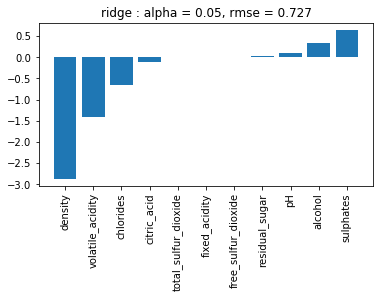

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model_name = "ridge"
alpha = 0.05
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
coef = pd.Series(data=ridge.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation=90)
ax.set_title(f"{model_name} : alpha = {alpha}, rmse = {rmse}")

- alpha 값에 따라서 bar 차트가 달라짐

- 계수와 관련된 규제에 패널티가 적용됐을 때 계수의 값이 어떻게 변형되는지 확인 가능

<br/>

### Reference

- https://www.youtube.com/watch?v=Lw6AayMhl9s